# RAND dataset analysis

## Open task on the RAND Terrorism Dataset

This is an open challenge to apply what you have learnt analysing Pride and Prejudice with spaCy on a dataset of real events. We have preprocessed the [RAND Terrorism Dataset]((http://www.rand.org/nsrd/projects/terrorism-incidents.html) for this task reducing the data to 10033 articles from 1968 to 2009.

Can you find out the following using the code you have written?
- Who are the terrorist groups and other persons mentioned in each article?
- What locations are mentioned in each article? Hint: a location just has a different label to a person
- From all of your entities, can you find out which named entities are terrorists from the syntactic relationships?
- With all of this information, can you plot a figure expressing the relationships between locations and terrorists?

There are no right answers to any of these questions, and there might not even be an answer at all.

In [40]:
# To get you started we can import Pandas and Seaborn which might help you
# build a graph or visualisation of the data
% matplotlib inline

from collections import defaultdict, Counter

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import spacy

nlp = spacy.load('en')

def read_file(file_name):
    with open(file_name, 'r') as file:
        return file.read()

def read_file_to_list(file_name):
    with open(file_name, 'r') as file:
        return file.readlines()

# The file has been re-encoded in UTF-8, the source encoding is Latin-1
terrorism_articles = read_file_to_list('data/rand-terrorism-dataset.txt')
terrorism_articles_nlp = [nlp(art) for art in terrorism_articles]

In [46]:
test = nlp(' ').join(terrorism_articles_nlp)

AttributeError: 'spacy.tokens.doc.Doc' object has no attribute 'join'

#### Example output using the full ~40,000 article dataset

![Heatmap of terrorist group and country](images/example_output_full.png)

## Example solution

### Define some geographical areas and groups to inspect

These are commonly mentioned in the full dataset, which you can prove for yourself using the same approaches as in the previous tutorial for Pride and Prejudice. You can process the full dataset at once into one spaCy span using the read_file() function. 

In [41]:
common_terr = ['taliban','al - qaeda','hamas','fatah','plo','bilad al - rafidayn']
common_locs = ['iraq','baghdad','kirkuk','mosul','afghanistan','kabul','basra','palestine','gaza','israel','istanbul','beirut','pakistan']

## Inspect each article for mentions of groups and locations

In [39]:
location_entity_dict = defaultdict(Counter)

for article in terrorism_articles_nlp:
    #Get all the groups and locations in the article
    article_ents = [ent.lemma_ for ent in article.ents if ent.label_ == 'PERSON' or ent.label_ == 'ORG']
    article_locs = [ent.lemma_ for ent in article.ents if ent.label_ =='GPE']

    #Filter groups and locations for only those which we are interested in
    ents_filtered = [ent for ent in article_ents if ent in common_terr]
    locs_filtered = [loc for loc in article_locs if loc in common_locs]

    for found_entity in ents_filtered:
        for found_location in locs_filtered:
            location_entity_dict[found_entity][found_location]+=1

# Let's inspect a specific combination as a cursory check on the for loop operating correctly
location_entity_dict['plo']['beirut']

11

## Transform defaultdict to a Pandas DataFrame

In [36]:
# Transform the dictionary into a pandas DataFrame and fill NaN values with zeroes
le_df = pd.DataFrame.from_dict(dict(location_entity_dict),dtype=int)
le_df = df.fillna(value=0).astype(int)

# Show DF to console
le_df

,al - qaeda,bilad al - rafidayn,fatah,hamas,plo,taliban
afghanistan,6,0,0,0,0,260
baghdad,20,31,0,0,0,0
basra,0,4,0,0,0,0
beirut,0,0,1,1,11,0
gaza,0,0,11,70,0,0
iraq,53,23,1,0,6,0
israel,1,0,16,21,19,0
istanbul,3,0,0,0,0,0
kabul,3,0,0,0,0,57
kirkuk,5,0,0,0,0,0


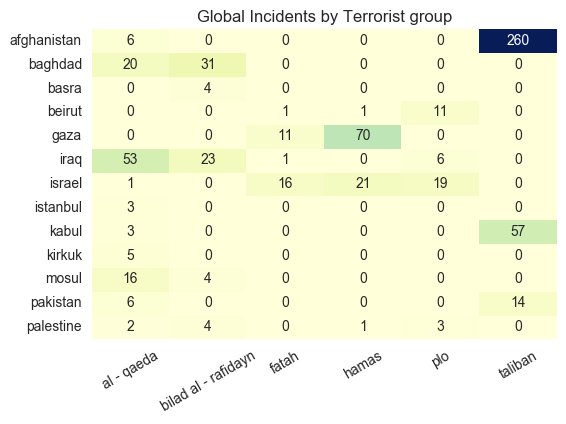

In [35]:
# Seaborn can transform a DataFrame directly into a figure

plt.figure()
map = sns.heatmap(df,annot=True,fmt='d',cmap='YlGnBu',cbar=False)

# Add features using the under the hood plt interface
plt.title('Global Incidents by Terrorist group')
plt.xticks(rotation=30)
plt.show()